# Problem Statement

Forecast the CocaCola prices and Airlines Passengers data set. 
<br>Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. <br>Finally which model you will use for Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

import warnings
warnings.filterwarnings('ignore')

In [2]:
ad = pd.read_excel('Airlines+Data.xlsx')
ad.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
ad.shape

(96, 2)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


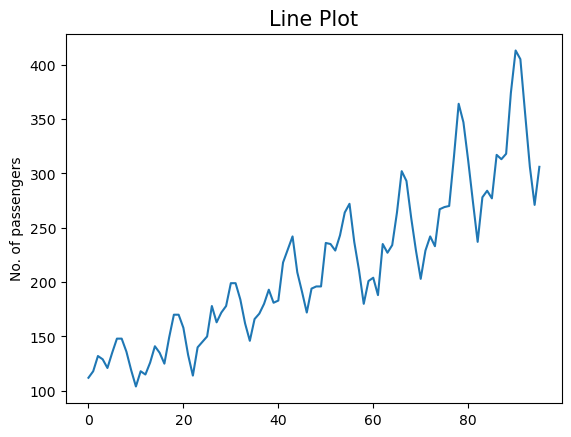

In [5]:
#Visualizing the overall data in order to the components present in our data

plt.title("Line Plot", size = 15)
plt.ylabel("No. of passengers")
plt.plot(ad['Passengers'])

In [6]:
ad["Date"] = pd.to_datetime(ad.Month,format="%Y-%m")
ad["month"] = ad.Date.dt.strftime("%b") # month extraction
ad["year"] = ad.Date.dt.strftime("%Y") # year extraction

In [7]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(ad['month']))

In [9]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [10]:
ad = pd.concat([ad,month_dummies], axis = 1)

In [11]:
ad

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,2002-09-01,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,2002-10-01,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,2002-11-01,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False


In [12]:
ad["t"] = np.arange(1,97)

ad["t_squared"] = ad["t"]*ad["t"]
ad.columns
ad["log_Passengers"] = np.log(ad["Passengers"])

<Axes: xlabel='month', ylabel='year'>

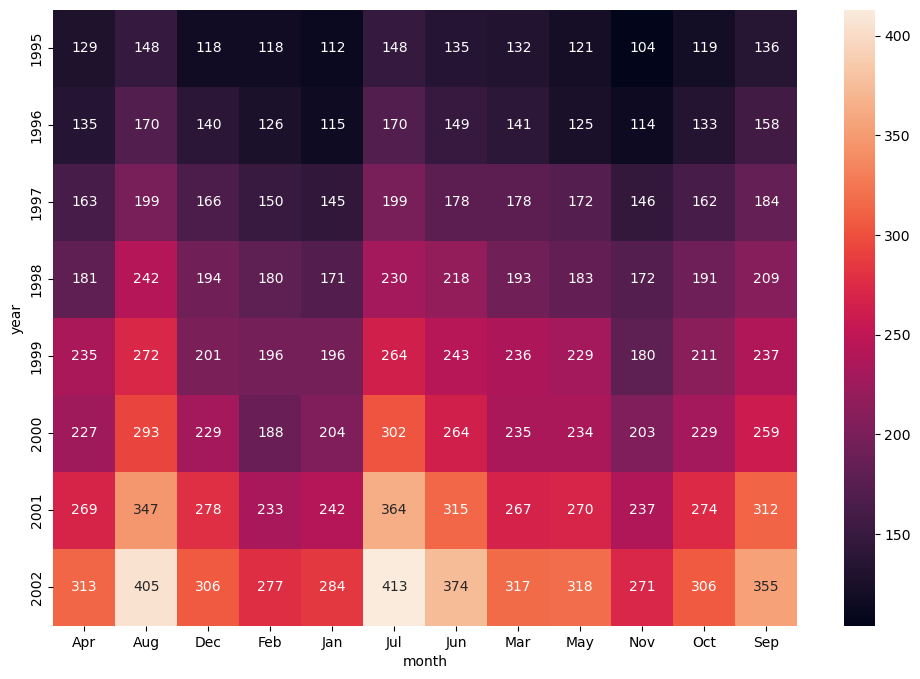

In [13]:
plt.figure(figsize = (12,8))
heatmap_y_month = pd.pivot_table(data=ad,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Passengers'>

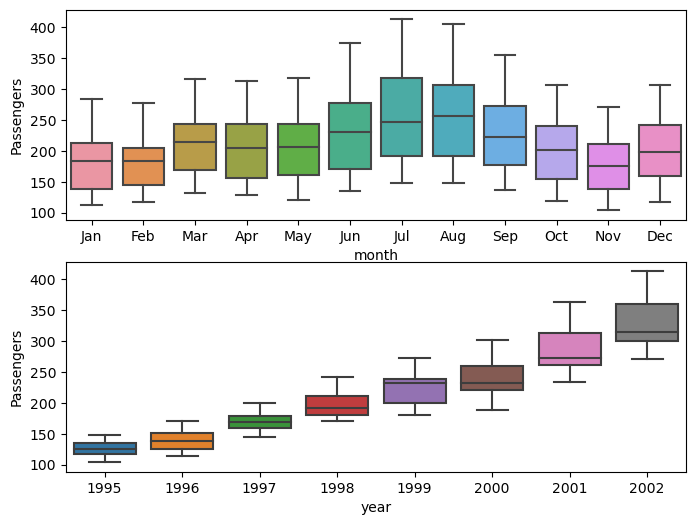

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=ad)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=ad)

Text(0.5, 1.0, 'Lag Plot')

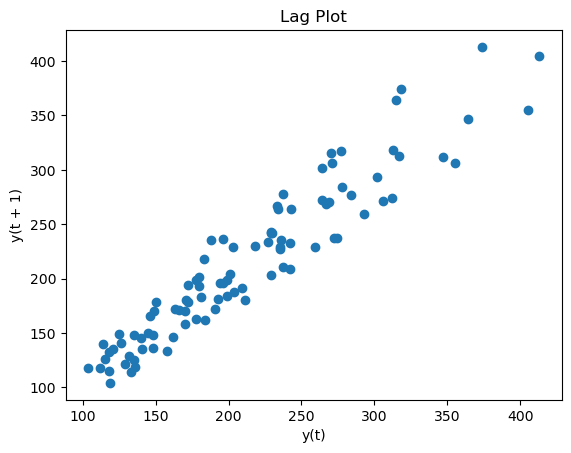

In [15]:
lag_plot(ad['Passengers'])
plt.title("Lag Plot")

Text(0, 0.5, 'Autocorrelation (r2 value)')

<Figure size 1500x800 with 0 Axes>

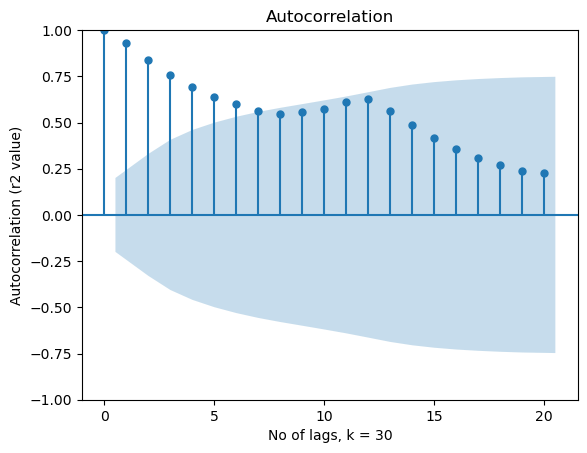

In [16]:
#acf plot

plt.figure(figsize = (15,8))
plot_acf(ad['Passengers'])                                    
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

<Axes: xlabel='year', ylabel='Passengers'>

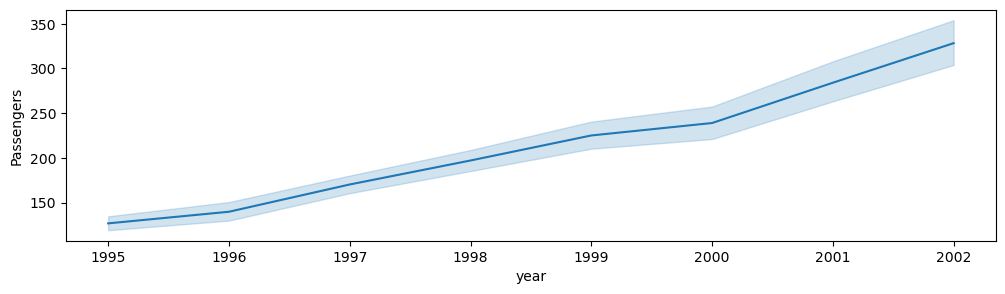

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=ad)

In [18]:
train = ad.head(82)
test = ad.head(14)

In [19]:
train

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2001-06-01,315,2001-06-01,Jun,2001,False,False,False,False,False,False,True,False,False,False,False,False,78,6084,5.752573
78,2001-07-01,364,2001-07-01,Jul,2001,False,False,False,False,False,True,False,False,False,False,False,False,79,6241,5.897154
79,2001-08-01,347,2001-08-01,Aug,2001,False,True,False,False,False,False,False,False,False,False,False,False,80,6400,5.849325
80,2001-09-01,312,2001-09-01,Sep,2001,False,False,False,False,False,False,False,False,False,False,False,True,81,6561,5.743003


In [20]:
test

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,False,False,False,False,False,False,True,False,False,False,False,False,6,36,4.905275
6,1995-07-01,148,1995-07-01,Jul,1995,False,False,False,False,False,True,False,False,False,False,False,False,7,49,4.997212
7,1995-08-01,148,1995-08-01,Aug,1995,False,True,False,False,False,False,False,False,False,False,False,False,8,64,4.997212
8,1995-09-01,136,1995-09-01,Sep,1995,False,False,False,False,False,False,False,False,False,False,False,True,9,81,4.912655
9,1995-10-01,119,1995-10-01,Oct,1995,False,False,False,False,False,False,False,False,False,False,True,False,10,100,4.779123


# Linear Model

In [21]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear  =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear  = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("Root Mean Square Error : ",rmse_linear)

Root Mean Square Error :  16.73260512989828


# Exponential Model

In [22]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

14.573362421909527

# Quadratic Model

In [23]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  14.646932618104431


# Additive Seasonality

In [24]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

67.24624193048926

# Additive Seasonality Quadratic

In [25]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  10.354658124861128


# Multiplicative Seasonality

In [26]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

60.49793790806535

# Multiplicative Additive Seasonality

In [27]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

4.626393624256374

# Multiplicative Seasonality Quadratic

In [28]:
mult_sea_Quad = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

121.21008755409503

In [29]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,4.626394
4,rmse_add_sea_quad,10.354658
1,rmse_Exp,14.573362
2,rmse_Quad,14.646933
0,rmse_linear,16.732605
5,rmse_Mult_sea,60.497938
3,rmse_add_sea,67.246242


In [30]:
#Build the model on entire data set

final_model= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=ad).fit()

In [31]:
pred_new  = pd.Series(final_model.predict(ad))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [32]:
ad["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

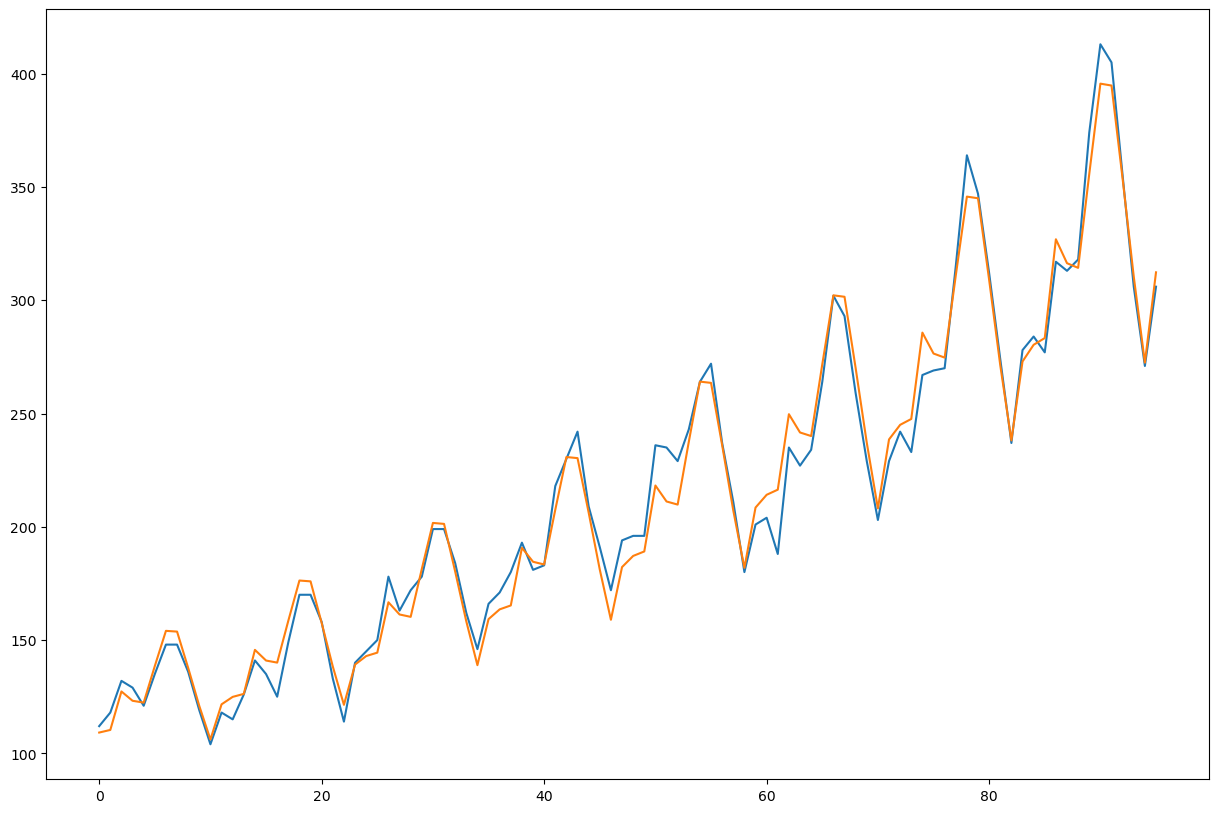

In [33]:
plt.figure(figsize=(15,10))
plt.plot(ad[['Passengers','forecasted_Passengers']].reset_index(drop=True))